**Abstract**

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

DiabetesPedigreeFunction: A score that indicates the genetic predisposition of the patient for diabetes from the patient's family record for diabetes










In [1]:
# Importing the necessary components
import pandas as pd
import numpy as np

In [2]:
# Reading the .csv file into a dataframe
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Checking the shape of dataset
df.shape

(768, 9)

In [4]:
# Checking for null values in the datasets
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Finding the unique values in the columns to make sure typos don't exist
for i in df.columns:
    print(i)
    print()
    # Converting the dataframe object to a list then turning that list into a set
    print(set(df[i].tolist()))
    print()

Pregnancies

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}

Glucose

{0, 44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199}

BloodPressure

{0, 24, 30, 38, 40, 44, 46, 48, 50, 52, 54, 55, 56, 58, 60, 61, 62, 64, 65, 66, 68, 70, 72, 74, 75, 76, 78, 80, 82, 84, 85, 86, 88, 90, 92, 94, 95, 96, 98, 100, 102, 104, 106, 108, 110, 114, 122}

SkinThickness

{0, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19

AxesSubplot(0.125,0.11;0.775x0.77)


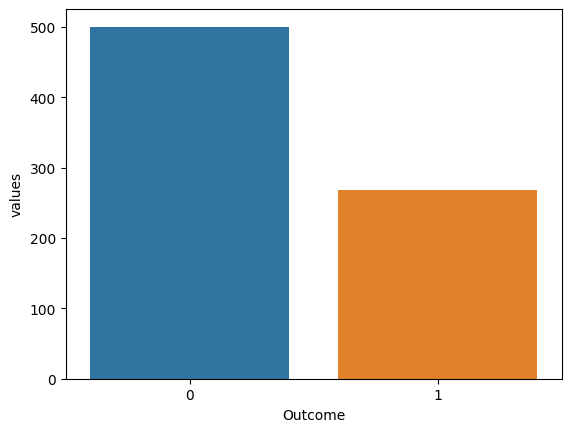

In [6]:
# Checking for label imbalance 
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a temporary dataframe to check how many times a particular value/class has occured
temp=df["Outcome"].value_counts()
temp_df= pd.DataFrame({'Outcome': temp.index,'values': temp.values})
print(sns.barplot(x = 'Outcome', y="values", data=temp_df))

In [7]:
# Checking the data types of the dataframe to make sure they are the correct data types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

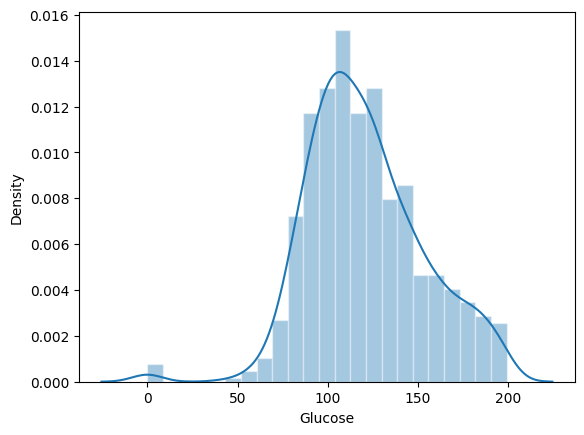

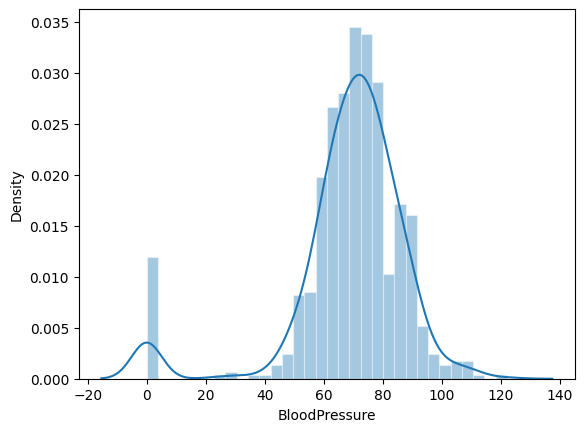

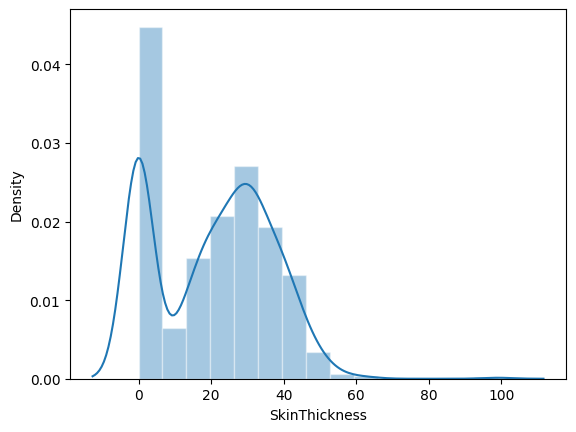

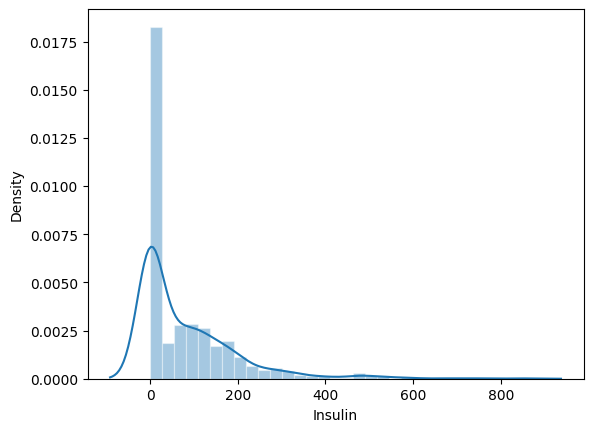

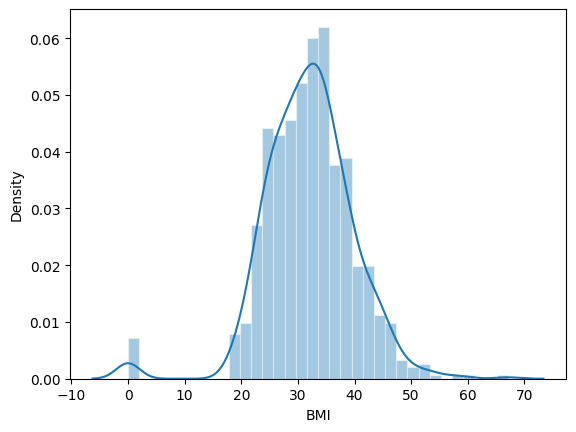

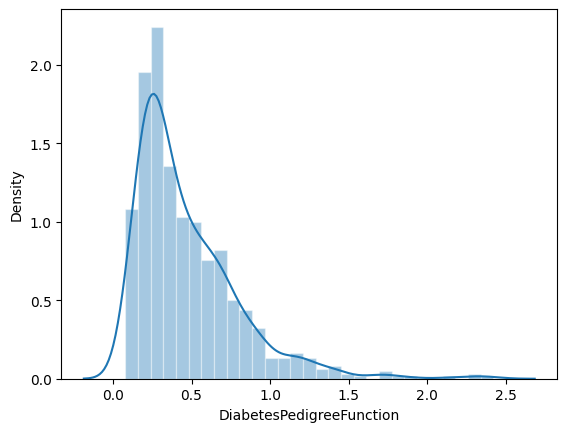

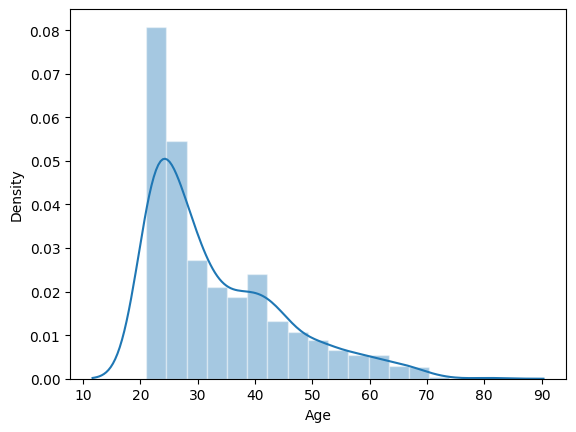

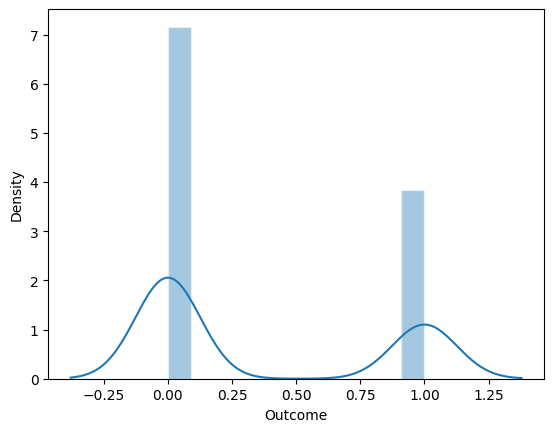

In [8]:
# Finding the distribution of the data and making sure it follows a normal distribution (bell curve)
def distplots(col):
    sns.histplot(
    df[col], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)
    plt.show()
    
# Looping through each column except for object data types
for i in list(df.select_dtypes(exclude=["object"]).columns)[1:]:
    distplots(i)

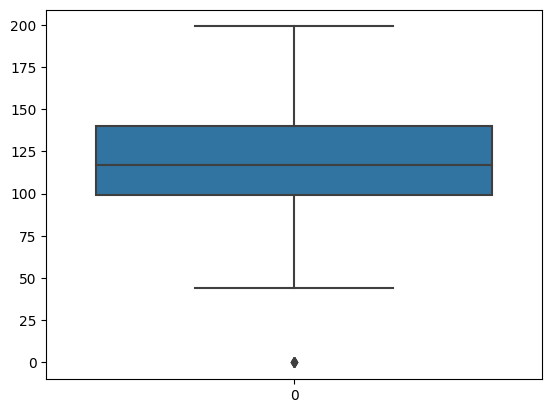

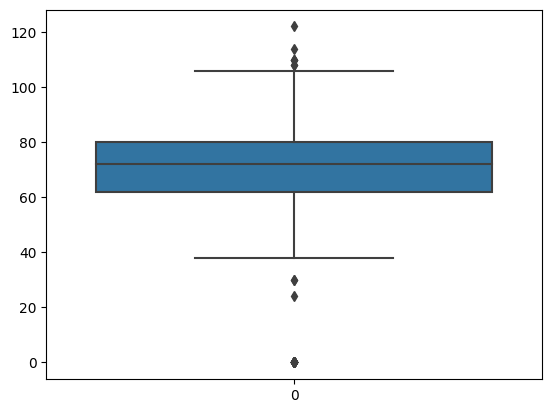

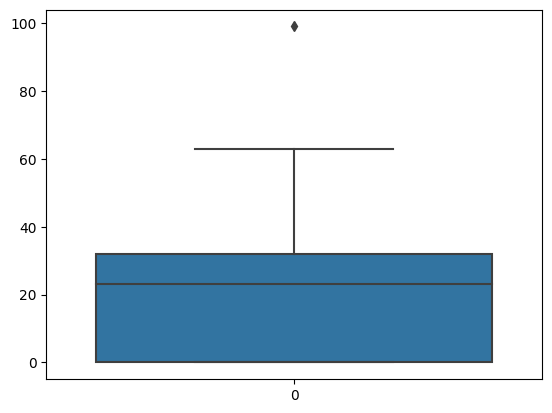

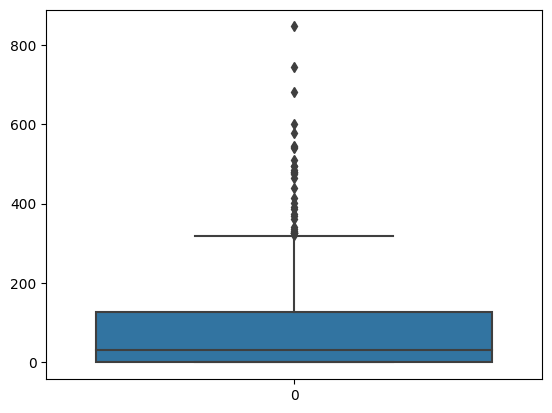

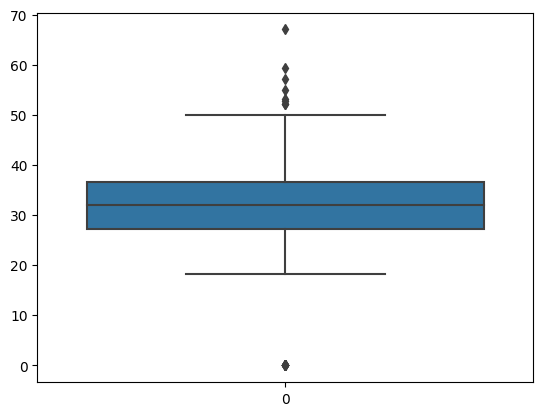

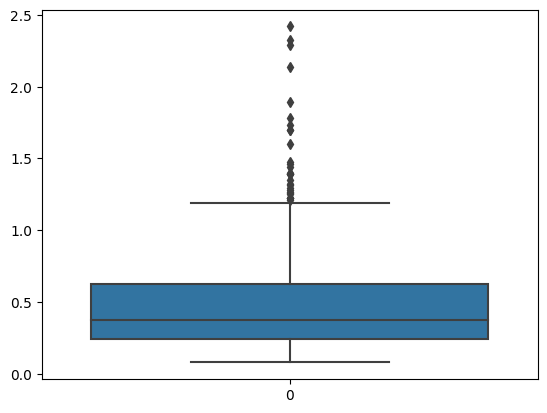

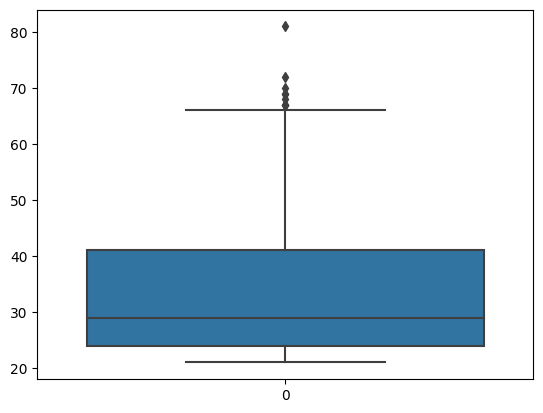

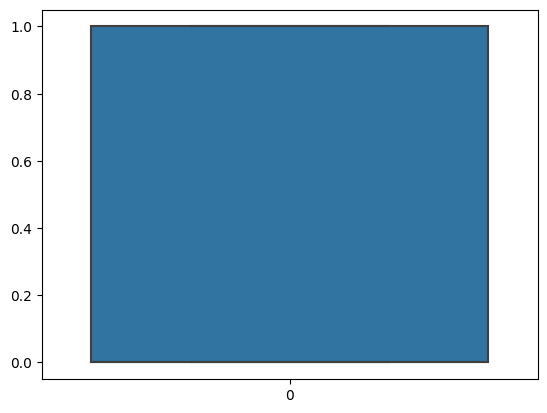

In [9]:
# Finding the outliers within the data using boxplots
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

In [10]:
# Printing statistical information about the dataset to make sure the dataset is correct
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [11]:
# Checking the number of rows with 0 to later correct the dataset
print("Number of rows with 0 values for each variable")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]

  print(col + ": "+str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [12]:
# Replacing 0's where they should not exist with NaN values to later correct the values
df['Glucose'] = df['Glucose'].replace(0,np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0,np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0,np.nan)
df['Insulin'] = df['Insulin'].replace(0,np.nan)
df['BMI'] = df['BMI'].replace(0,np.nan)

In [13]:
# Rechecking the number of null values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
# Rechecking the number of rows with 0 after replacing 0's with NaN
print("Number of rows with 0 values for each variable")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]

  print(col + ": "+str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [15]:
# Replacing NaN values with the mean of the non-missing values by using fillna()
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [16]:
# Rechecking the number of null values after fixing the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
# Saving the preprocessed dataframe as a .csv file
df.to_csv("Diabetes_Pre-Processed.csv")

<AxesSubplot: >

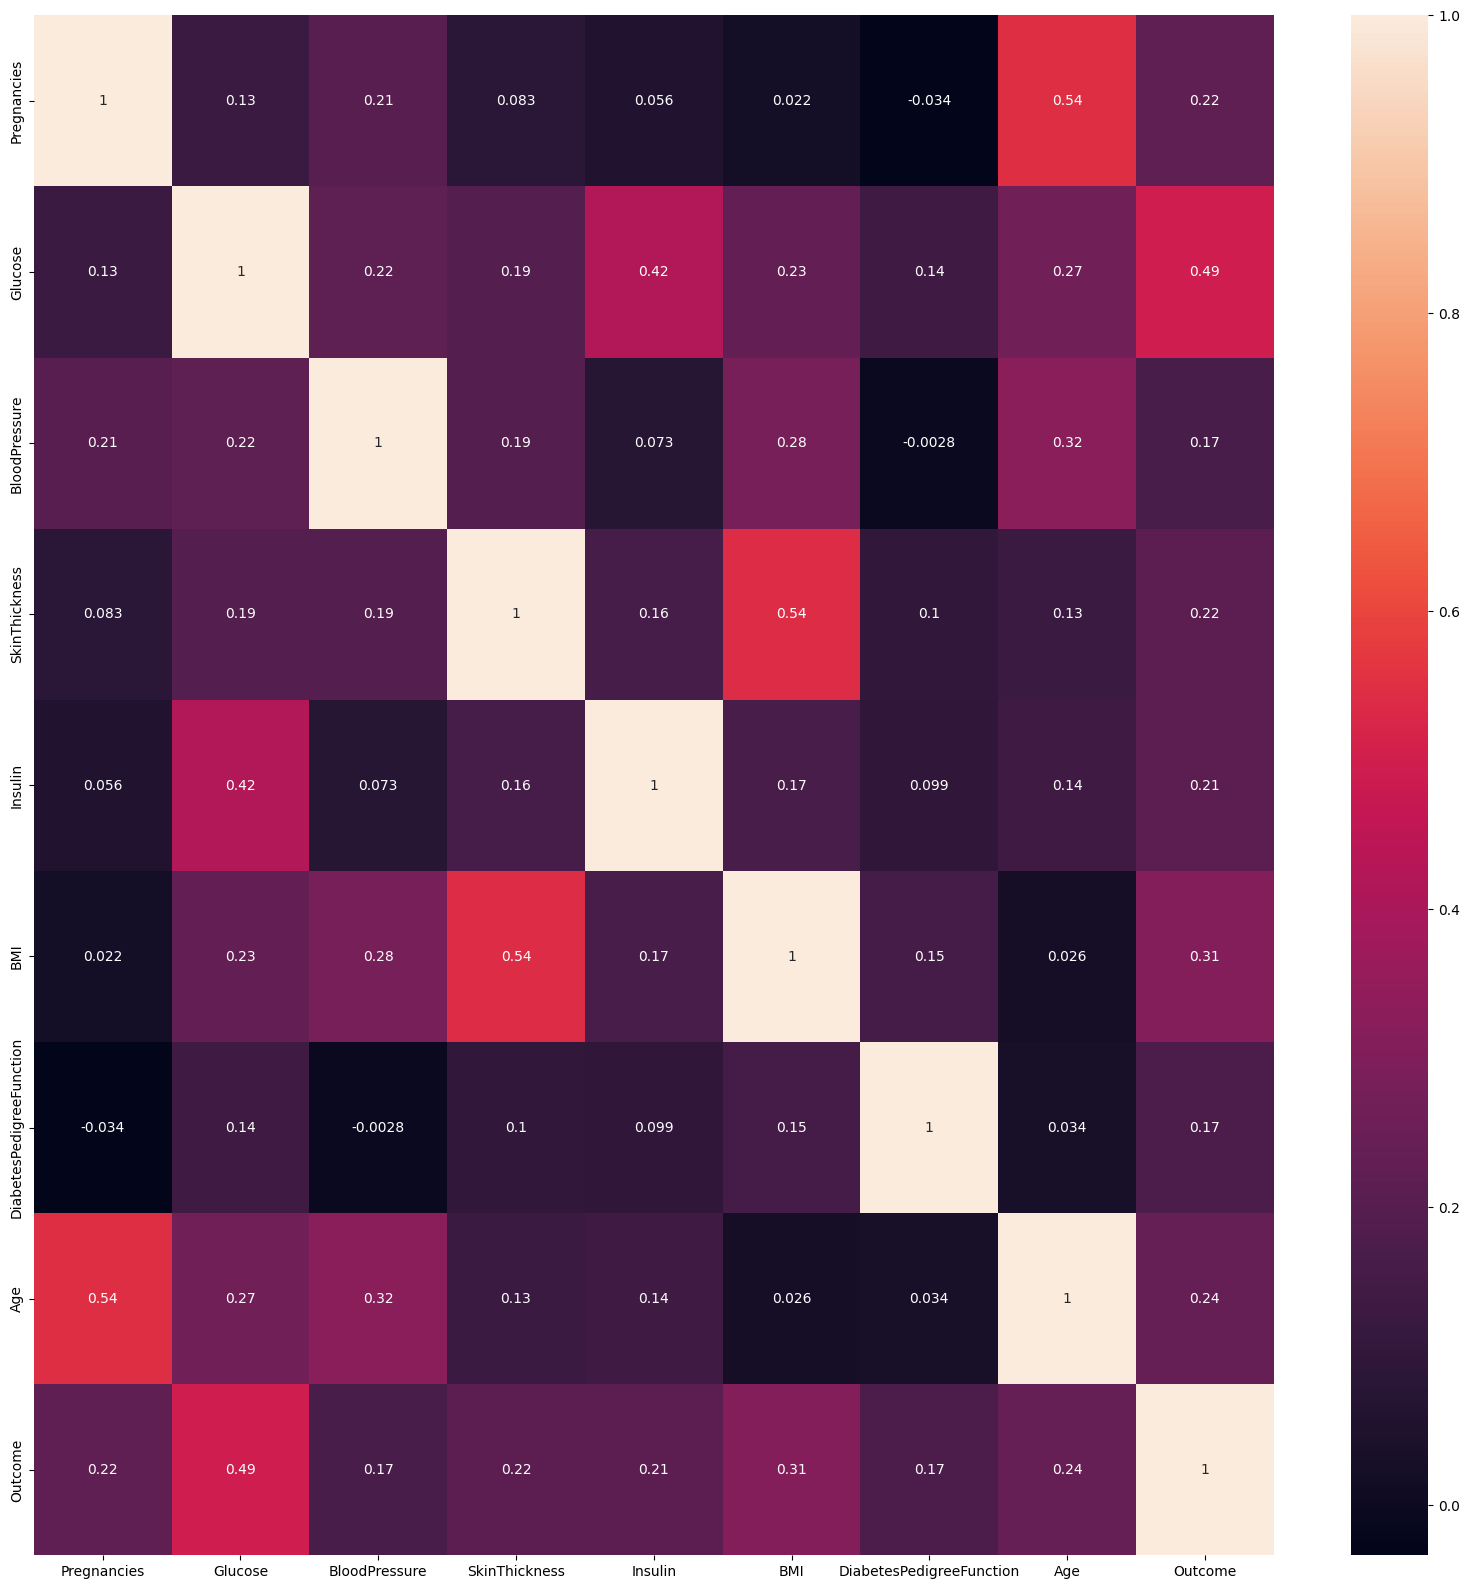

In [18]:
# Finding the correlations between the variables using a heatmap
# High correlations between two independent variables will cause issues
plt.figure(figsize=(20,20))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [19]:
# Seperating the independent and dependent variables
x=df.drop(["Outcome"],axis=1)
y=df["Outcome"]

In [20]:
# Checking the label imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print(Counter(y))

Counter({0: 500, 1: 268})


In [21]:
# Balancing the imbalanced labels using oversampling to preserve data
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(x, y)

# Checking for label imbalance
print(Counter(y_ros))

Counter({1: 500, 0: 500})


In [22]:
# Scaling using the MinMaxScaler to ensure there is no overfit when fitting data into the model
#.fit_transforms() fits to the data and transforms it.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(X_ros)
y=y_ros

In [23]:
# Applying PCA (Principal Component Analysis) to choose the minimum number of principal components, so there is 95% of the variance.
# This allows for data to be represented as a smaller set of variables, so trends, clusters, outliers, etc. can be seen
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_PCA = pca.fit_transform(x)

# Checking that PCA has reduced to a smaller set of variables that preserve 95% of the variance.
print(x.shape)
print(X_PCA.shape)

(1000, 8)
(1000, 7)


In [24]:
# Splitting the dataset into the training and testing datasets while preserving 20% of the data for testing and 80% of the data for training
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_PCA, y, test_size=0.2, random_state=7)
# Making a second split to create the final training dataset and the validation dataset (the dataset that allows hyperparamter tuning/tuning the number of hidden layers with unbiased data)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.2)

In [25]:
# Creating a sequential model
from keras.models import Sequential
model = Sequential()

from keras.layers import Dense, Dropout
# Add the first dense layer with one input tensor and one output tensor. It has 32 nodes and an input dimension of 7 because of the number of columns after performing PCA
model.add(Dense(32, activation='relu', input_dim=7))
# Adding a dropout layer with a frequency of rate of 0.5 (carries 50% of the neurons to the next layer)
model.add(Dropout(0.5))
# Adding a rectified linear activation function to output the input directly if it is positive or output zero
model.add(Dense(24, activation = 'relu'))
# Adding a dropout layer with a frequency of rate of 0.5 (carries 50% of the neurons to the next layer)
model.add(Dropout(0.5))
# Adding a rectified linear activation function to output the input directly if it is positive or output zero
model.add(Dense(18, activation = 'relu'))
# Adding a dropout layer with a frequency of rate of 0.5 (carries 50% of the neurons to the next layer)
model.add(Dropout(0.5))
# Adding a rectified linear activation function to output the input directly if it is positive or output zero
model.add(Dense(8, activation = 'relu'))
# Adding a dropout layer with a frequency of rate of 0.5 (carries 50% of the neurons to the next layer)
model.add(Dropout(0.5))
# Creating a final layer with a depth of 1 and an activation of sigmoid since detection of Diabetes is a binary classification problem
model.add(Dense(1, activation = 'sigmoid'))
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

2023-01-06 02:13:19.503813: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-06 02:13:19.608348: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-06 02:13:19.612652: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-06 02:13:19.612668: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [26]:
# Generating a model summary that states the layer type, the output shape for the layer, and the  number of paramaters being trained in the layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 18)                450       
                                                                 
 dropout_2 (Dropout)         (None, 18)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1

In [27]:
# Generating the history of the training of the model that trains with training data then tests with the validation data in each epoch, giving the accuracy values 
# Checking for overfitting by making sure the validation accuracy is not decreasing as the accuracy is increasing
history = model.fit(x_train,y_train,validation_data = (x_test, y_test),epochs = 200,verbose = 1)                                      

Epoch 1/200
20/20 [==============================] - 1s 17ms/step - loss: 0.6980 - accuracy: 0.4984 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5188 - val_loss: 0.6895 - val_accuracy: 0.6550
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5578 - val_loss: 0.6844 - val_accuracy: 0.6900
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5656 - val_loss: 0.6785 - val_accuracy: 0.6800
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5375 - val_loss: 0.6744 - val_accuracy: 0.7300
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5734 - val_loss: 0.6691 - val_accuracy: 0.7750
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.5875 - val_loss: 0.6624 - val_accuracy: 0.7650
Epoch 8/200


In [28]:
# Checking the model's training and testing accuracies
scores = model.evaluate(x_train,y_train)
print("Training Accuracy: {:.2f}%".format(scores[1]*100))
scores = model.evaluate(x_test,y_test)
print("Testing Accuracy: {:.2f}%".format(scores[1]*100))

20/20 [==============================] - 0s 761us/step - loss: 0.3759 - accuracy: 0.8438
Training Accuracy: 84.38%
7/7 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.8250
Testing Accuracy: 82.50%


In [29]:
# Predicting diabetes
Target_Classifcation = model.predict(x_test)
Target_Classifcation  = (Target_Classifcation >0.5)
# Creating a confusion matrix to check how many true positives (top left), false positives (top right), false negatives (bottom left), and true negatives (bottom right) the model produced
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Target_Classifcation))

7/7 [==============================] - 0s 1ms/step
[[72 20]
 [15 93]]


In [30]:
# Importing the necessary components to create an ROC Curve and Precision/Recall Curve
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, plot_precision_recall_curve, f1_score, confusion_matrix


# Creating a function to plot the ROC Curve to check the true positive to false negative rate and make sure the model is appropriate
def plot_auc(t_y, p_y):
    # fpr = False Positive Rate, tpr = True Positive Rate
    # Precision/True Positive Rate (TPR) = True Positive / (True Positive + False Negative)
    # Recall/False Positive Rate (FPR) = False Positive /(True Negative + False Positive)
    fpr, tpr, thresholds = roc_curve(t_y, p_y, pos_label=1)
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('classification', auc(fpr, tpr)))
    c_ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')

# Creating a function to plot the Precision/Recall Curve Precision, recall, and thresholds are used.
def plot_precision_recall_curve_helper(t_y, p_y):
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    precision, recall, thresholds = precision_recall_curve(t_y, p_y, pos_label=1)
    aps = average_precision_score(t_y, p_y)
    c_ax.plot(recall, precision, label = '%s (AP Score:%0.2f)'  % ('classification', aps))
    c_ax.plot(recall, precision, color='red', lw=2)
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')
    

# Creating a function to plot the history of the model, the validation accuracy, and the losses
def plot_history(history):
    f = plt.figure()
    f.set_figwidth(15)
    f.add_subplot(1, 2, 1)
    # Plotting the validation loss
    plt.plot(history.history['val_loss'], label='val loss')
    # Plotting the training loss
    plt.plot(history.history['loss'], label='train loss')
    plt.legend()
    plt.title("Model Loss")
    f.add_subplot(1, 2, 2)
    # Plotting the validation accuracy
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    # Plotting the training loss
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.legend()
    plt.title("Model Accuracy")
    plt.show()

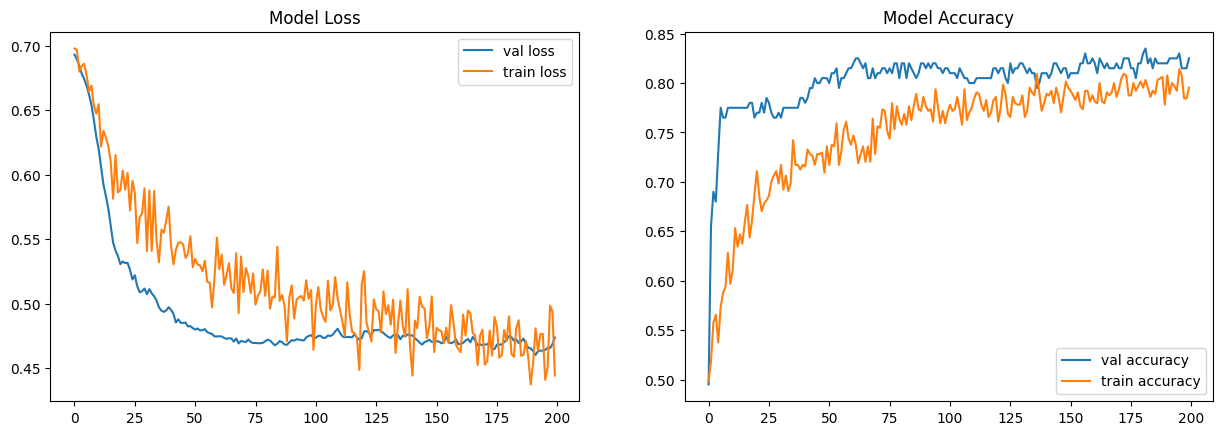

In [31]:
# Calling the plot_history function from the previous cell to create graphs of model loss and model accuracy to make sure overfitting doesn't occur 
# Overfitting happens when the training accuracy is increasing, but the validation accuracy is decreasing; overfitting can also occur if the training loss is decreasing, but the validation loss is increasing
hist = plot_history(history)

7/7 [==============================] - 0s 773us/step


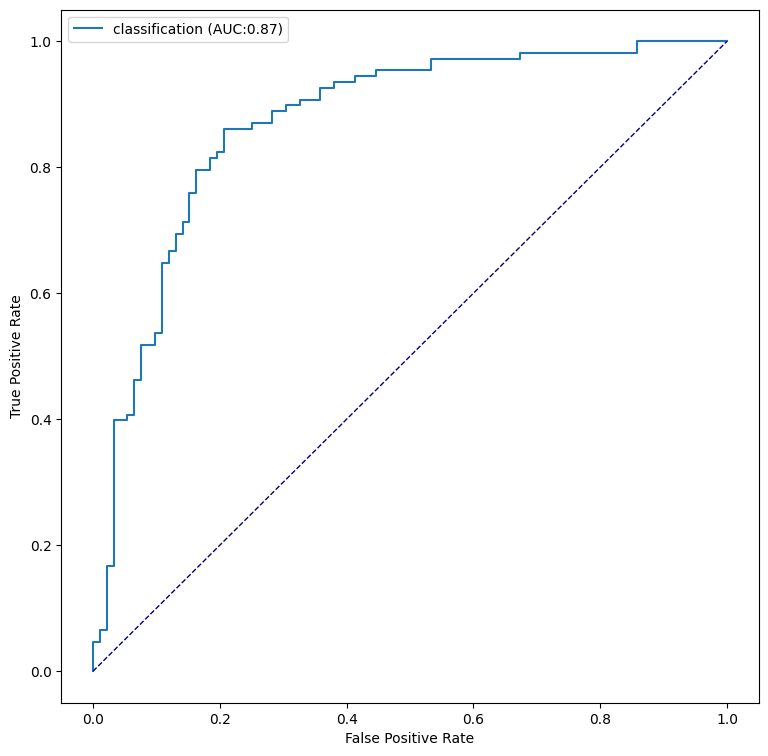

In [32]:
# Creating an ROC Curve using the ROC curve-generating function
# The closer the AUC is to 1, the better the model
plot_auc(y_test, model.predict(x_test, verbose = True))

7/7 [==============================] - 0s 843us/step


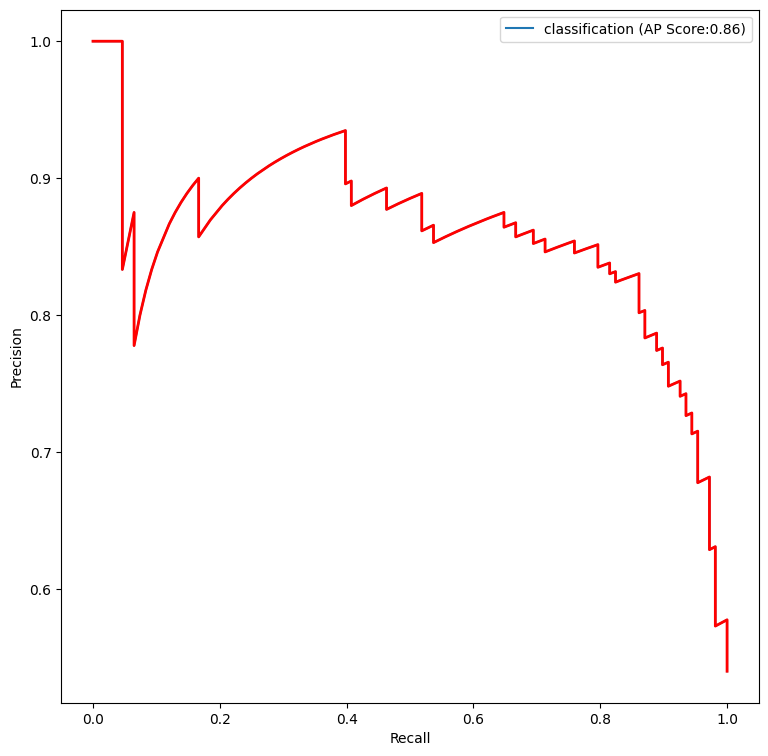

In [33]:
# Plotting the Precision/Recall Curve to check the tradeoff between precision (ratio of the retrieved items that are relevant) and recall (the ratio of relevant items that are retrieved)
plot_precision_recall_curve_helper(y_test, model.predict(x_test, verbose = True))

In [34]:
# Finding the threshold to optimize the model's performance 
# Using the threshold to make binary classification
# Calculating the F1 Score (a measure of the model's accuracy)
def calc_f1(prec,recall):
    # Using "if recall and prec else 0" to ensure division by 0 doesn't lead to an error
    return 2*(prec*recall)/(prec+recall) if recall and prec else 0

precision, recall, thresholds = precision_recall_curve(y_test, model.predict(x_test, verbose = True))
# Using a list comprehension to call F1 Score calculation function above while looping through the threshold list, which contains the probability that precision and recall aren't in sync anymore
f1score = [calc_f1(precision[i],recall[i]) for i in range(len(thresholds))]
# Finding the argmax (the index of the value that maximizes the F1 Score)
index_max = np.argmax(f1score)
# Finding the threshold of the index that maximizes the F1 Score
threshold = thresholds[index_max]
print(threshold)
# Printing the precision, recall, threshold, and F1 Score of the index that maximizes the F1 Score
print('Precision: '+ str(precision[index_max]))
print('Recall: '+ str(recall[index_max]))
print('Threshold: '+ str(thresholds[index_max]))
print('F1 Score: ' + str(f1score[index_max]))

7/7 [==============================] - 0s 946us/step
0.5223456
Precision: 0.8303571428571429
Recall: 0.8611111111111112
Threshold: 0.5223456
F1 Score: 0.8454545454545456


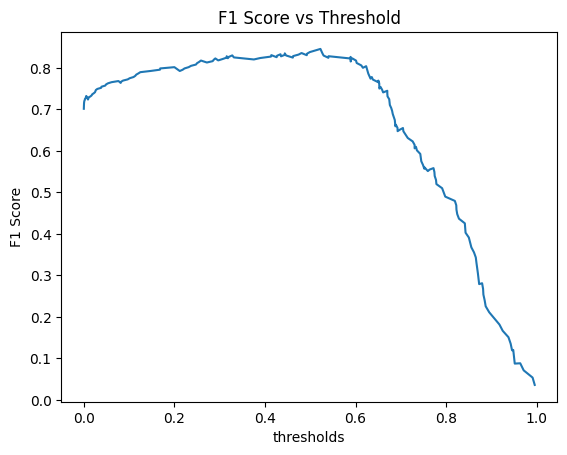

In [35]:
# Plotting the threshold (probability that a prediction of Diabetes is true) and F1 Score
plt.figure()
plt.plot(thresholds, f1score)
plt.title("F1 Score vs Threshold")
plt.xlabel("thresholds")
plt.ylabel("F1 Score")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=003bf7cd-2cf6-4679-b413-3ba6444adb0f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>